# Introduction
## Latar Belakang
Terdapat 2 dasar tipe sistem rekomendasi:

1. Sistem Rekomendasi Sederhana
2. Sistem Rekomendasi Berdasarkan Konten dari Fiturnya
 
**Sistem Rekomendasi Sederhana**, seperti namanya adalah sistem rekomendasi yang hanya menggunakan urutan sebagai dasar perhitungannya, yang biasanya digunakan dalam '5 film terbaik' kita akan menggunakan urutan berdasarkan mungkin vote terbanyak, rating tertinggi, penjualan film paling tinggi, atau apapun yang lain.



Dalam kasus ini, kita akan menggunakan kombinasi antara rata-rata rating, jumlah vote, dan membentuk metric baru dari metric yang sudah ada, kemudian kita akan melakukan sorting untuk metric ini dari yang tertinggi ke terendah.





## Simple Recommender Engine using Weighted Average
Simple Recommender Engine menawarkan rekomendasi yang umum untuk semua user berdasarkan popularitas film dan terkadang genre.

Ide awal di balik sistem rekomendasi ini adalah sebagai berikut.

1. Film-film yang lebih populer akan memiliki kemungkinan yang lebih besar untuk disukai juga oleh rata-rata penonton.
2. Model ini tidak memberikan rekomendasi yang personal untuk setiap tipe user. 
3. Implementasi model ini pun juga bisa dibilang cukup mudah, yang perlu kita lakukan hanyalah mengurutkan film-film tersebut berdasarkan rating dan popularitas dan menunjukkan film teratas dari list film tersebut.


Sebagai tambahan, kita dapat menambahkan genre untuk mendapatkan film teratas untuk genre spesifik tersebut
<br>
<br>
### Formula dari IMDB dengan Weighted Rating

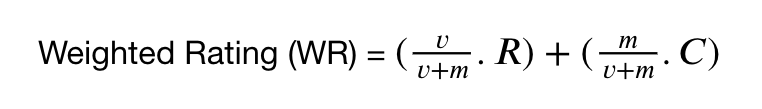
 

dimana,

- v: jumlah votes untuk film tersebut
- m: jumlah minimum votes yang dibutuhkan supaya dapat masuk dalam chart
- R: rata-rata rating dari film tersebut
- C: rata-rata jumlah votes dari seluruh semesta film

# Task 1 - Library Import and File Unloading
<br>

## Import Library dan File Unloading
Langkah pertama yang harus kita lakukan adalah melakukan import library yang dibutuhkan untuk pengerjaan project ini dan melakukan pembacaan dataset.

Notes :

- Library yang akan kita gunakan adalah pandas (as pd) dan numpy (as np)
- Dataset yang akan digunakan adalah title.basics.tsv dan title.ratings.tsv
Akses dataset :
1. title.basic.tsv = https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/title.basics.tsv
2. title.ratings.tsv = https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/title.ratings.tsv

In [18]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np

#lakukan pembacaan dataset
movie_df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/title.basics.tsv', sep='\t') #untuk menyimpan title_basics.tsv
rating_df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/title.ratings.tsv', sep='\t') #untuk menyimpan title.ratings.tsv

# Task 2 - Cleaning table movie
<br>

## 5 Data teratas dari table movie
<br>
Hal pertama yang akan kita lakukan adalah menampilkan 5 data teratas yang ada pada table movie (movie_df). 

In [19]:
print(movie_df.head())

      tconst  titleType                                      primaryTitle  \
0  tt0221078      short                         Circle Dance, Ute Indians   
1  tt8862466  tvEpisode  ¡El #TeamOsos va con todo al "Reality del amor"!   
2  tt7157720  tvEpisode                                     Episode #3.41   
3  tt2974998  tvEpisode                         Episode dated 16 May 1987   
4  tt2903620  tvEpisode                  Frances Bavier: Aunt Bee Retires   

                                      originalTitle  isAdult startYear  \
0                         Circle Dance, Ute Indians        0      1898   
1  ¡El #TeamOsos va con todo al "Reality del amor"!        0      2018   
2                                     Episode #3.41        0      2016   
3                         Episode dated 16 May 1987        0      1987   
4                  Frances Bavier: Aunt Bee Retires        0      1973   

  endYear runtimeMinutes             genres  
0      \N             \N  Documentary,Short  


## Tipe Data dari Setiap Kolom
<br>
Setelah berhasil menampilkan 5 data teratas yang ada pada table movie (movie_df), hal selanjutnya yang akan kita lakukan adalah melakukan pengecekan tipe data dari masing-masing kolom yang ada pada table movie (movie_df) tersebut.

In [20]:
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB
None


## Pengecekan Data dengan Nilai NULL
<br>
Merupakan suatu hal yang wajib untuk melakukan pengecekan terhadap nilai NULL yang ada di dalam dataset saat melakukan cleaning.

Oleh karena itu, hal selanjutnya yang akan kita lakukan adalah melakukan pengecekan apakah ada data bernilai NULL pada masing-masing kolom yang ada pada table movie (movie_df)

In [21]:
print(movie_df.isnull().sum())

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64


Pada output diatas, terdapat 3 kolom yang memiliki data null yaitu <b>primaryTitle</b>, <b>originalTitle</b>, <b>genres</b>

## Analisis Kolom dengan data bernilai NULL - part 1
<br>
Dari hasil pengecekan nilai NULL yang sudah dilakukan sebelumnya, diketahui bahwa kolom 'primaryTitle' dan 'originalTitle' memiliki banyak data yang bernilai NULL.

Hal selanjutnya yang akan kita lakukan adalah melakukan pengecekan terhadap bentuk data dari kolom primaryTitle dan originalTitle yang bernilai NULL.

In [22]:
print(movie_df.loc[(movie_df['primaryTitle'].isnull()) | (movie_df['originalTitle'].isnull())])

          tconst  titleType primaryTitle originalTitle  isAdult startYear  \
9000  tt10790040  tvEpisode          NaN           NaN        0      2019   
9001  tt10891902  tvEpisode          NaN           NaN        0      2020   
9002  tt11737860  tvEpisode          NaN           NaN        0      2020   
9003  tt11737862  tvEpisode          NaN           NaN        0      2020   
9004  tt11737866  tvEpisode          NaN           NaN        0      2020   
9005  tt11737872  tvEpisode          NaN           NaN        0      2020   
9006  tt11737874  tvEpisode          NaN           NaN        0      2020   
9007   tt1971246  tvEpisode          NaN           NaN        0      2011   
9008   tt2067043  tvEpisode          NaN           NaN        0      1965   
9009   tt4404732  tvEpisode          NaN           NaN        0      2015   
9010   tt5773048  tvEpisode          NaN           NaN        0      2015   
9011   tt8473688  tvEpisode          NaN           NaN        0      1987   

## Membuang Data dengan Nilai NULL - part 1
Setelah melihat hasil sebelumnya, dapat dilihat bahwa semua data tidak memiliki judul dan kita dapat membuang data-data tersebut.

Pekerjaan selanjutnya yang akan kita lakukan adalah membuang data dengan nilai NULL tersebut dan melihat jumlah data yang ada setelah data-data bernilai NULL tersebut dibuang. Buang data-data dengan nilai NULL dari kolom <b>primaryTitle</b> dan <b>originalTitle</b> .

In [23]:
#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9011


## Analisis Kolom dengan data bernilai NULL - part 2
Selain kolom 'primaryTitle' dan 'originalTitle',masih terdapat kolom lain yang memiliki data bernilai NULL. Kolom tersebut adalah kolom 'genres'

Selanjutnya, kita akan melakukan hal yang sama seperti yang sudah kita lakukan pada kolom 'primaryTitle' dan 'originalTitle'.

Lakukan pengecekan terhadap bentuk data dari kolom <b>genres yang bernilai NULL</b>. 

In [24]:
print(movie_df.loc[(movie_df['genres'].isnull())])

          tconst  titleType  \
9014  tt10233364  tvEpisode   
9015  tt10925142  tvEpisode   
9016  tt10970874  tvEpisode   
9017  tt11670006  tvEpisode   
9018  tt11868642  tvEpisode   
9019   tt2347742  tvEpisode   
9020   tt3984412  tvEpisode   
9021   tt8740950  tvEpisode   
9022   tt9822816  tvEpisode   
9023   tt9900062  tvEpisode   
9024   tt9909210  tvEpisode   

                                           primaryTitle originalTitle  \
9014  Rolling in the Deep Dish\tRolling in the Deep ...             0   
9015  The IMDb Show on Location: Star Wars Galaxy's ...             0   
9016  Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...             0   
9017  ...ein angenehmer Unbequemer...\t...ein angene...             0   
9018  GGN Heavyweight Championship Lungs With Mike T...             0   
9019  No sufras por la alergia esta primavera\tNo su...             0   
9020  I'm Not Going to Come Last, I'm Just Going to ...             0   
9021  Weight Loss Resolution Restart - Ins 

## Membuang Data dengan Nilai NULL - part 2
Setelah melihat hasil sebelumnya, dapat dilihat bahwa semua data tidak memiliki judul dan kita dapat membuang data-data tersebut kolom <b>genres yang bernilai NULL</b>.  .Pekerjaan selanjutnya yang akan kita lakukan adalah membuang data dengan nilai NULL tersebut dan melihat jumlah data yang ada setelah data-data bernilai NULL tersebut dibuang. 

In [25]:
#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[(movie_df['genres'].notnull())]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9000


## Mengubah Nilai '\\N'
Jika kita perhatikan pada kolom 'startYear' , 'endYear', dan 'runtimeMinutes', terdapat data dengan nilai '\\N'

'\\N' berarti NULL.

Hal selanjutnya yang akan kita lakukan adalah mengubah nilai dari \\\N tersebur menjadi np.nan dan melakukan casting kolom startYear, endYear, dan runtimeMinutes menjadi float64.

In [26]:
#mengubah nilai '\\N' pada startYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
print(movie_df['startYear'].unique()[:5])

#mengubah nilai '\\N' pada endYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
print(movie_df['endYear'].unique()[:5])

#mengubah nilai '\\N' pada runtimeMinutes menjadi np.nan dan cast kolomnya menjadi float64
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')
print(movie_df['runtimeMinutes'].unique()[:5])


[1898. 2018. 2016. 1987. 1973.]
[  nan 2005. 1955. 2006. 1999.]
[nan 29.  7. 23. 85.]


## Mengubah nilai genres menjadi list
Selanjutnya, kita akan membuat sebuah function yang bernama transform_to_list untuk mengubah nilai genre menjadi list. 

In [27]:
def transform_to_list(x):
    if ',' in x: 
    #ubah menjadi list apabila ada data pada kolom genre
        return x.split(',')
    else: 
    #jika tidak ada data, ubah menjadi list kosong
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))
print(movie_df['genres'])

0       [Documentary, Short]
1            [Comedy, Drama]
2        [Comedy, Game-Show]
3                         []
4                         []
                ...         
8995                      []
8996                      []
8997                      []
8998                      []
8999         [Horror, Short]
Name: genres, Length: 9000, dtype: object


# Task 3 - Cleaning table ratings
<br>

## Menampilkan 5 data teratas
Seperti yang sudah kita lakukan pada table movie (movie_df) sebelumnya, sekarang kita akan menampilkan 5 data teratas dari table ratings (rating_df)

In [29]:
print(rating_df.head())

      tconst  averageRating  numVotes
0  tt0000001            5.6      1608
1  tt0000002            6.0       197
2  tt0000003            6.5      1285
3  tt0000004            6.1       121
4  tt0000005            6.1      2050


## Menampilkan tipe data
Selanjutnya, kita akan menampilkan tipe data dari masing-masing kolom yang ada pada table rating (rating_df)

In [30]:
print(rating_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB
None


# Task 4 - Joining table movie and table ratings
<br>

## Inner Join table movie dan table rating
Mari kita melakukan inner join antara rating_df dan movie_df untuk mendapatkan rating pada setiap film yang tersedia, lalu tampilkan 5 data teratas dan tipe data dari tiap kolom yang ada. 

In [31]:
#Lakukan join pada kedua table
movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')

#Tampilkan 5 data teratas
print(movie_rating_df.head())

#Tampilkan tipe data dari tiap kolom
print(movie_rating_df.info())

      tconst  titleType              primaryTitle             originalTitle  \
0  tt0043745      short                 Lion Down                 Lion Down   
1  tt0167491      video         Wicked Covergirls         Wicked Covergirls   
2  tt6574096  tvEpisode      Shadow Play - Part 2      Shadow Play - Part 2   
3  tt6941700  tvEpisode              RuPaul Roast              RuPaul Roast   
4  tt7305674      video  UCLA Track & Field Promo  UCLA Track & Field Promo   

   isAdult  startYear  endYear  runtimeMinutes  \
0        0     1951.0      NaN             7.0   
1        1     1998.0      NaN            85.0   
2        0     2017.0      NaN            22.0   
3        0     2017.0      NaN             NaN   
4        0     2017.0      NaN             NaN   

                           genres  averageRating  numVotes  
0     [Animation, Comedy, Family]            7.1       459  
1                              []            5.7         7  
2  [Adventure, Animation, Comedy]        

## Memperkecil ukuran Table
Hal selanjutnya yang akan kita lakukan adalah memperkecil ukuran table dengan menghilangkan semua nilai NULL dari kolom startYear dan runtimeMinutes karena tidak masuk akal jikalau film tersebut tidak diketahui kapan tahun rilis dan durasi nya. 

In [32]:
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

#Untuk memastikan bahwa sudah tidak ada lagi nilai NULL
print(movie_rating_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1374
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1004 non-null   object 
 1   titleType       1004 non-null   object 
 2   primaryTitle    1004 non-null   object 
 3   originalTitle   1004 non-null   object 
 4   isAdult         1004 non-null   int64  
 5   startYear       1004 non-null   float64
 6   endYear         17 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1004 non-null   object 
 9   averageRating   1004 non-null   float64
 10  numVotes        1004 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 94.1+ KB
None


# Task 5 - Building Simple Recommender System
kembali ke formula IMDB weighted average, kita sudah memiliki value v dan R. Sekarang kita perlu mencari untuk value C dan m
<br>

## Pertanyaan 1: Berapa nilai C?
Hal pertama yang akan kita cari adalah nilai dari C yang merupakan rata-rata dari averageRating

In [33]:
C = movie_rating_df['averageRating'].mean()
print(C)

6.829581673306767


## Pertanyaan 2: Berapa nilai m?
Mari kita ambil contoh film dengan numVotes di atas 80% populasi, jadi populasi yang akan kita ambil hanya sebesar 20%. 

In [34]:
m = movie_rating_df['numVotes'].quantile(0.8)
print(m)

229.0


## Pertanyaan 3: Bagaimana cara membuat fungsi weighted formula?
Selanjutnya kita harus membuat sebuah fungsi dengan menggunakan dataframe sebagai variable.

In [37]:
def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C #Rumus IMDb 
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

#melakukan pengecekan dataframe
print(movie_rating_df.head())



      tconst  titleType          primaryTitle         originalTitle  isAdult  \
0  tt0043745      short             Lion Down             Lion Down        0   
1  tt0167491      video     Wicked Covergirls     Wicked Covergirls        1   
2  tt6574096  tvEpisode  Shadow Play - Part 2  Shadow Play - Part 2        0   
5  tt2262289      movie               The Pin               The Pin        0   
6  tt0874027  tvEpisode         Episode #32.9         Episode #32.9        0   

   startYear  endYear  runtimeMinutes                          genres  \
0     1951.0      NaN             7.0     [Animation, Comedy, Family]   
1     1998.0      NaN            85.0                              []   
2     2017.0      NaN            22.0  [Adventure, Animation, Comedy]   
5     2013.0      NaN            85.0                              []   
6     2006.0      NaN            29.0       [Comedy, Game-Show, News]   

   averageRating  numVotes     score  
0            7.1       459  7.009992  
1 

## Pertanyaan 4: Bagaimana cara membuat simple recommender system?
Dari task yang sudah kita lakukan sebelumnya, telah terdapat field tambahan 'score'.

Pertama kita akan filter numVotes yang lebih dari m kemudian diurutkan score dari tertinggi ke terendah untuk diambil nilai beberapa nilai teratas

In [38]:
def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False) #urutkan dari nilai tertinggi ke terendah
    
    #Ambil data 100 teratas
    df = df[:top]
    return df
    
#Ambil data 25 teratas     
print(simple_recommender(movie_rating_df, top=25))

         tconst  titleType                                   primaryTitle  \
68    tt4110822  tvEpisode                                  S.O.S. Part 2   
236   tt2200252      video                    Attack of the Clones Review   
1181  tt7697962  tvEpisode            Chapter Seventeen: The Missionaries   
326   tt7124590  tvEpisode            Chapter Thirty-Four: Judgment Night   
1045  tt0533506  tvEpisode                                       The Prom   
71    tt8399426  tvEpisode                                        Savages   
1234  tt2843830  tvEpisode                                          VIII.   
1087  tt4295140   tvSeries                                   Chef's Table   
1054  tt2503932  tvEpisode                                Trial and Error   
448   tt0337566      video                       AC/DC: Live at Donington   
624   tt0620159  tvEpisode                                     Strike Out   
1281  tt3166390  tvEpisode                         Looking for a Plus-One   

## Pertanyaan 5: Bagaimana cara membuat simple recommender system dengan user preferences?
Dari task yang sudah dilakukan sebelumnya, dapat dilihat sekarang daftar film telah diurutkan dari score tertinggi ke terendah.

Film dengan averageRating yang tinggi tidak selalu mendapat posisi yang lebih tinggi dibanding film dengan averageRating lebih rendah, hal ini disebabkan karena kita juga memperhitungkan faktor banyaknya votes


Sistem rekomendasi ini masih bisa ditingkatkan dengan menambah filter spesifik tentang titleType, startYear, ataupun filter yang lain

Pekerjaan selanjutnya yang akan kita lakukan adalah membuat function untuk melakukan filter berdasarkan isAdult, startYear, dan genres. 

In [39]:
df = movie_rating_df.copy()

def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    #ask_adult = yes/no
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    #ask_start_year = numeric
    df = df.loc[df['startYear'] >= int(ask_start_year)]

    #ask_genre = 'all' atau yang lain
    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] >= m] #Mengambil film dengan m yang lebih besar dibanding numVotes
    df = df.sort_values(by='score', ascending=False)
    
    #jika kamu hanya ingin mengambil 100 teratas
    df = df[:top]
    return df

print(user_prefer_recommender(df,
                       ask_adult = 'no',
                        ask_start_year = 2000,
                       ask_genre = 'drama'
                       ))

         tconst  titleType                         primaryTitle  \
68    tt4110822  tvEpisode                        S.O.S. Part 2   
1181  tt7697962  tvEpisode  Chapter Seventeen: The Missionaries   
326   tt7124590  tvEpisode  Chapter Thirty-Four: Judgment Night   
71    tt8399426  tvEpisode                              Savages   
1234  tt2843830  tvEpisode                                VIII.   
1054  tt2503932  tvEpisode                      Trial and Error   
1281  tt3166390  tvEpisode               Looking for a Plus-One   
151   tt3954426  tvEpisode                      Bleeding Kansas   
1344  tt6644294  tvEpisode       The Hostile Hospital: Part Two   
357   tt4084774  tvEpisode                 Trial and Punishment   
708   tt2751234  tvEpisode                         Resurrection   
605   tt9141176  tvEpisode                59 horas desaparecido   
983   tt5063116  tvEpisode                                Shell   
1017  tt2206822  tvEpisode                      Vested Interes